In [1]:
from netCDF4 import Dataset as NetCDFFile
import math
import numpy as np
import pandas as pd
import isamcalc_lib as isam
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

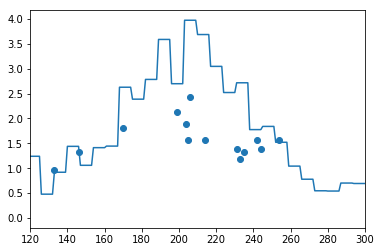

In [2]:
## Site by site time series evaluation
# Read in the obs of study #2534
lat = 56.46
lon = -99.97
# Measured year is 2001 - 2002
obsx = np.array([133, 146, 170, 199, 204, 205, 206, 214, 231, 233, 235, 244, 242, 254])
# 17% contribution from root Ra
# 1.0368 is the transfer factor from umol C m-2 s-1 to gC m-2 day-1
obsy = 0.83 * 1.0368 * np.array([1.12, 1.54, 2.11, 2.48, 2.19, 1.81, 2.82, 1.83, 1.61, 1.38, 1.53, 1.61, 1.81, 1.81])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='boreal_2534/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])
  
modx = np.arange(0,365)
mody = rh1m[(140*365):(140*365+365)]
obs_2534 = obsy
mod_2534 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

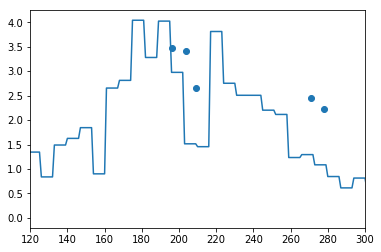

In [3]:
# Read in the obs of study #2396
lat = 53.99
lon = -105.12
# The data is selected from the BSFM (closed-canopy balck spruce with feather moss) community only
# since this site is more similar to the mature forest.
# Measured year is 1998 - 1999
obsx = np.array([196, 204, 209, 271, 278, 354])
obsy = 0.83 * 1.0368 * np.array([4.03, 3.97, 3.08, 2.84, 2.58, 0.38])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='boreal_2396/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(138*365):(138*365+365)]
obs_2396 = obsy
mod_2396 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

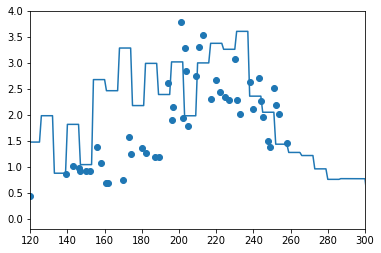

In [4]:
# Read in the obs of study #1382
# Boreal deciduous
lat = 53.63
lon = -106.2
# Measured year is 1994

obsx = np.array([106, 112, 114, 116, 120, 139, 143, 146, 147, 150, 152, 156, 158, 161, 162, 170, 173, 174, 180, 182, 187, 189, 194, 196, 197, 201, \
202, 203, 204, 205, 209, 211, 213, 217, 220, 222, 225, 227, 230, 231, 233, 238, 240, 243, 244, 245, 248, 249, 251, 252, 254, 258])
# 60% contribution from root Ra
# 23.56364 is the transfer factor from mg CO2 m-2 s-1 to gC m-2 day-1
obsy = 0.4 * 23.56364 * np.array([0.037,0.061, 0.034, 0.028, 0.046, 0.092, 0.107, 0.104, 0.098, 0.098, 0.098, 0.147, 0.115, 0.074, 0.074, 0.079, 0.167, 0.132, 0.144, 0.135, \
0.126, 0.126, 0.278, 0.202, 0.228, 0.402, 0.205, 0.349, 0.301, 0.19, 0.292, 0.351, 0.375, 0.245, 0.283, 0.26, 0.248, 0.242, 0.327, 0.242, \
0.215, 0.28, 0.224, 0.288, 0.241, 0.209, 0.159, 0.147, 0.267, 0.232, 0.214, 0.155])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='boreal_decid_1382/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(133*365):(133*365+365)]
obs_1382 = obsy
mod_1382 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

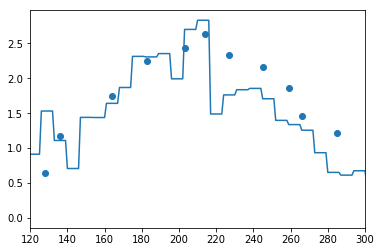

In [5]:
# Read in the obs of study #4604
lat = 61.78
lon = 24.3
# The data is selected from the Forest community only
# This paper also has all fluxes for the mire (wetland) which maybe helpful for the future study
# Measured year is 2005
obsx = np.array([28, 62, 100, 128, 136, 164, 183, 203, 214, 227, 245, 259, 266, 285, 304, 314])
# 30% contribution from root Ra (since no data then we assume 30%)
# 6.545455 is the transfer factor from g CO2 m-2 h-1 to gC m-2 day-1
obsy = 0.7 * 6.545455 * np.array([0.041, 0.01, 0.072, 0.141, 0.257, 0.38, 0.491, 0.532, 0.576, 0.511, 0.473, 0.406, 0.318, 0.266, 0.276, 0.235])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='boreal_4604/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(144*365):(144*365+365)]
obs_4604 = obsy
mod_4604 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

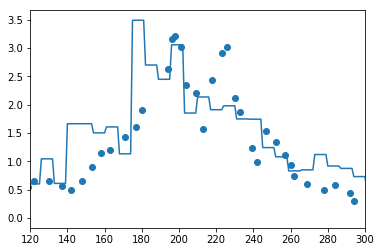

In [6]:
# Read in the obs of study #4166
lat = 62.87
lon = 30.82
# Measured year is 2001 - 2004, here only used the data for year 2001. Other data can be obtained later
obsx = np.array([106, 117, 119, 122, 130, 137, 142, 148, 153, 158, 163, 171, 177, 180, 194, 196, 198, 201, 204, 209, 213, 218, 223, 226, 230, 233, \
239, 242, 247, 252, 257, 260, 262, 269, 278, 284, 292, 294])
# 35% contribution from root Ra
# 1.0368 is the transfer factor from umol CO2 m-2 s-1 to gC m-2 day-1
obsy = 0.65 * 1.0368 * np.array([0.289, 0.557, 0.806, 0.959, 0.959, 0.825, 0.729, 0.979, 1.343, 1.688, 1.783, 2.109, 2.377, 2.837, 3.891, 4.696, 4.773, \
4.466, 3.47, 3.278, 2.339, 3.623, 4.313, 4.485, 3.144, 2.78, 1.822, 1.477, 2.282, 1.994, 1.649, 1.381, 1.094, 0.9, \
0.73, 0.86, 0.653, 0.442])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='boreal_4166/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(140*365):(140*365+365)]
obs_4166 = obsy
mod_4166 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

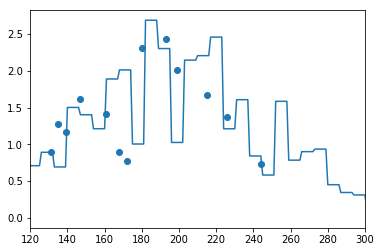

In [7]:
# Read in the obs of study #5305
lat = 46.77
lon = 9.87
# Measured year is 2007
obsx = np.array([36, 54, 88, 110, 117, 131, 135, 139, 147, 161, 168, 172, 180, 193, 199, 215, 226, 244])
# 30% contribution from root Ra (since no data then we assume 30%)
# 0.024 is the transfer factor from mg C m-2 h-1 to gC m-2 day-1
obsy = 0.7 * 0.024 * np.array([6.27, 11.7, 6.46, 26.19, 53, 53.1, 76.28, 69.15, 95.97, 84.41, 53.19, 46.06, 137.16, 144.35, 119.37, 99.79, 81.97, 43.65])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='boreal_5305/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(146*365):(146*365+365)]
obs_5305 = obsy
mod_5305 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx,mody)

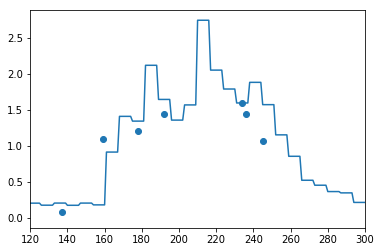

In [8]:
# Read in the obs of study #5391
# Tundra in Sweden
lat = 68.333
lon = 18.5

# Only the sample from sweden is used here, another from Svalbard is at the northernmost on small island so not sure if ISAM
# has output for that grid.
# Measured year is 2007 - 2008
obsx = np.array([27, 64, 92, 137, 159, 178, 192, 234, 236, 245])

# Guessed 70% contribution from root Ra for tundra (since no data)
# 0.006545455 is the transfer factor from mg CO2 m-2 h-1 to gC m-2 day-1
obsy = 0.3 * 0.006545455 * np.array([161.65, 33.00, 22.07, 41.09, 560.68, 614.31, 732.67, 811.49, 733.97, 540.54])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='tundra_5391/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(146*365):(146*365+365)]
obs_5391 = obsy
mod_5391 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

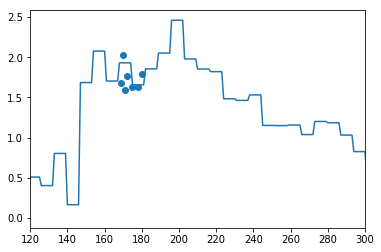

In [9]:
# Read in the obs of study #4212
# Grassland in Finland
lat = 67.72
lon = 29.6

# Measured year is 2003 - 2004
obsx = np.array([169, 170, 171, 172, 175,  178,  180])

# Guessed 50% contribution from root Ra for grassland (since no data)
# 1.0368 is the transfer factor from umol CO2 m-2 s-1 to gC m-2 day-1
obsy = 0.5 * 1.0368 * np.array([3.24, 3.92, 3.07, 3.4, 3.13,   3.13,  3.46])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='grass_4212/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(140*365):(140*365+365)]
obs_4212 = obsy
mod_4212 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

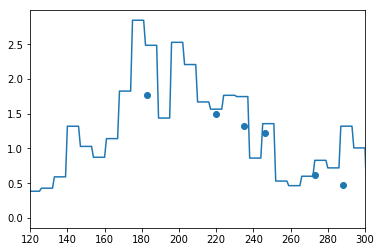

In [10]:
# Read in the obs of study #7198
# Shrubland in Finland
lat = 63.9
lon = 23.93

# Measured year is 2002 - 2004
obsx = np.array([183, 220, 235, 246, 273, 288, 304])# 505, 512, 526, 545, 560, 573, 585, 589, 600, \
                 #615, 643, 857, 876, 885, 898, 912, 939, 951, 972, 980])

# The sample AB1 is applied here since it to be the close to the multu-samples mean
# 55% of Reco is Rs
# Guessed 70% contribution from root Ra for this shrubland site since Ra is high comparing to Reco (since no data)
# 0.024 is the transfer factor from mg C m-2 h-1 to gC m-2 day-1
obsy = 0.55 * 0.3 * 0.024 * np.array([446.32, 377.88, 332.32, 309.51, 157.81, 119.83, 89.41])# 110.72, 216.74, 307.55, 428.63, \
                                #534.59, 625.4, 511.68, 443.47, 450.97, 359.96, 329.46, 191.59, 199.03, 327.76, 350.4, \
                                #532.12, 494.05, 456.09, 334.72, 205.88])

# Read in the model simulation
path='/data/jain1/c/sshu3/SBGC/results/rh_eval/'
site='shrub_7198/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(140*365):(140*365+365)]
obs_7198 = obsy
mod_7198 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

('Slope:', array([[1.12842579]]))
('Intercept:', array([0.18994542]))
('Root mean squared error: ', 0.10520747551058733)
('R2 score: ', 0.7579013240131807)


Text(0.2,1.54,'Slope: 1.13')

<Figure size 720x576 with 0 Axes>

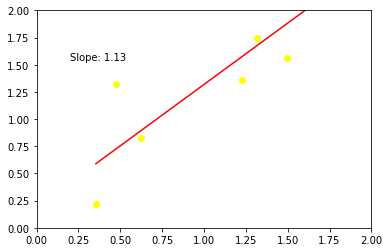

In [11]:
## Summary of all sites
# Compile all data and make the scatter plot
obs_boreal = np.concatenate((obs_2534, obs_2396, obs_4604, obs_4166))
mod_boreal = np.concatenate((mod_2534, mod_2396, mod_4604, mod_4166))
obs_tundra = obs_5391
mod_tundra = mod_5391
obs_decid = obs_1382
mod_decid = mod_1382
obs_grass = obs_4212
mod_grass = mod_4212
obs_shrub = obs_7198
mod_shrub = mod_7198

# Regression
# prepare input data-set
lenz = len(obs_shrub)
x = np.zeros((lenz,1))
y = np.zeros((lenz,1))
x[:,0] = obs_shrub
y[:,0] = mod_shrub

# x = np.random.rand(100, 1)
# y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

fig = plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.scatter(obs_shrub, mod_shrub, color='yellow')
plt.plot(x, y_predicted, color='r')
plt.text(0.2, 1.54, 'Slope: 1.13')
#plt.scatter(obs_decid, mod_decid, color='gold')
#plt.scatter(obs_tundra, mod_tundra, color='brown')
#plt.scatter(obs_grass, mod_grass, color='blue')
#plt.scatter(obs_shrub, mod_shrub, color='red')
# line = mlines.Line2D([0, 4.5], [0, 4.5], color='red')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
#plt.legend(['Regression', 'Boreal Deciduous', 'Tundra', 'Grassland', 'Shrubland'])
#plt.savefig('Calibration_rh_res.jpg')

In [ ]:
#========================================================
# Calculate R2
#========================================================

Xobs = obs_decid   # Obs CH4 flux
Xmod = mod_decid   # CH4 flux from ISAM

Xobs[np.isnan(Xmod)] = np.float('nan')
Xmod[np.isnan(Xobs)] = np.float('nan')
correlation = ma.corrcoef(ma.masked_invalid(Xobs), ma.masked_invalid(Xmod))[0,1]
r2 = correlation*correlation
print(r2)

In [ ]:
#========================================================
# Calculate ME for specific site
#========================================================
Xobs = obs_shrub   # Obs CH4 flux
Xmod = mod_shrub   # CH4 flux from ISAM
me = np.nanmean(Xobs-Xmod)
print(me)

In [ ]:
obs_b_mean = np.mean(obs_boreal)
obs_b_std = np.std(obs_boreal)
mod_b_mean = np.mean(mod_boreal)
mod_b_std = np.std(mod_boreal)

obs_d_mean = np.mean(obs_decid)
obs_d_std = np.std(obs_decid)
mod_d_mean = np.mean(mod_decid)
mod_d_std = np.std(mod_decid)

obs_t_mean = np.mean(obs_tundra)
obs_t_std = np.std(obs_tundra)
mod_t_mean = np.mean(mod_tundra)
mod_t_std = np.std(mod_tundra)

obs_g_mean = np.mean(obs_grass)
obs_g_std = np.std(obs_grass)
mod_g_mean = np.mean(mod_grass)
mod_g_std = np.std(mod_grass)

obs_s_mean = np.mean(obs_shrub)
obs_s_std = np.std(obs_shrub)
mod_s_mean = np.mean(mod_shrub)
mod_s_std = np.std(mod_shrub)

fig, ax = plt.subplots()
plt.xlim([0, 2.5])
plt.ylim([0, 2.5])
plt.scatter(obs_b_mean, mod_b_mean, color='green')
plt.scatter(obs_d_mean, mod_d_mean, color='gold')
plt.scatter(obs_t_mean, mod_t_mean, color='brown')
plt.scatter(obs_g_mean, mod_g_mean, color='blue')
plt.scatter(obs_s_mean, mod_s_mean, color='red')
ax.errorbar()
line = mlines.Line2D([0, 4.5], [0, 4.5], color='red')
ax.add_line(line)
plt.legend(['1:1 line', 'Boreal Evergreen', 'Boreal Deciduous', 'Tundra', 'Grassland', 'Shrubland'])
#plt.savefig('Calibration_rh_mean.jpg')